In [1]:
from os.path  import join
import struct
from array import array
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  

# Set file paths based on added MNIST Datasets
training_images_filepath = '../data/mnist-dataset/train-images.idx3-ubyte'
training_labels_filepath = '../data/mnist-dataset/train-labels.idx1-ubyte'
test_images_filepath = '../data/mnist-dataset/t10k-images.idx3-ubyte'
test_labels_filepath = '../data/mnist-dataset/t10k-labels.idx1-ubyte'

In [3]:
# Load MINST dataset
print('Loading MNIST dataset...')
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print('MNIST dataset loaded.')

Loading MNIST dataset...
MNIST dataset loaded.


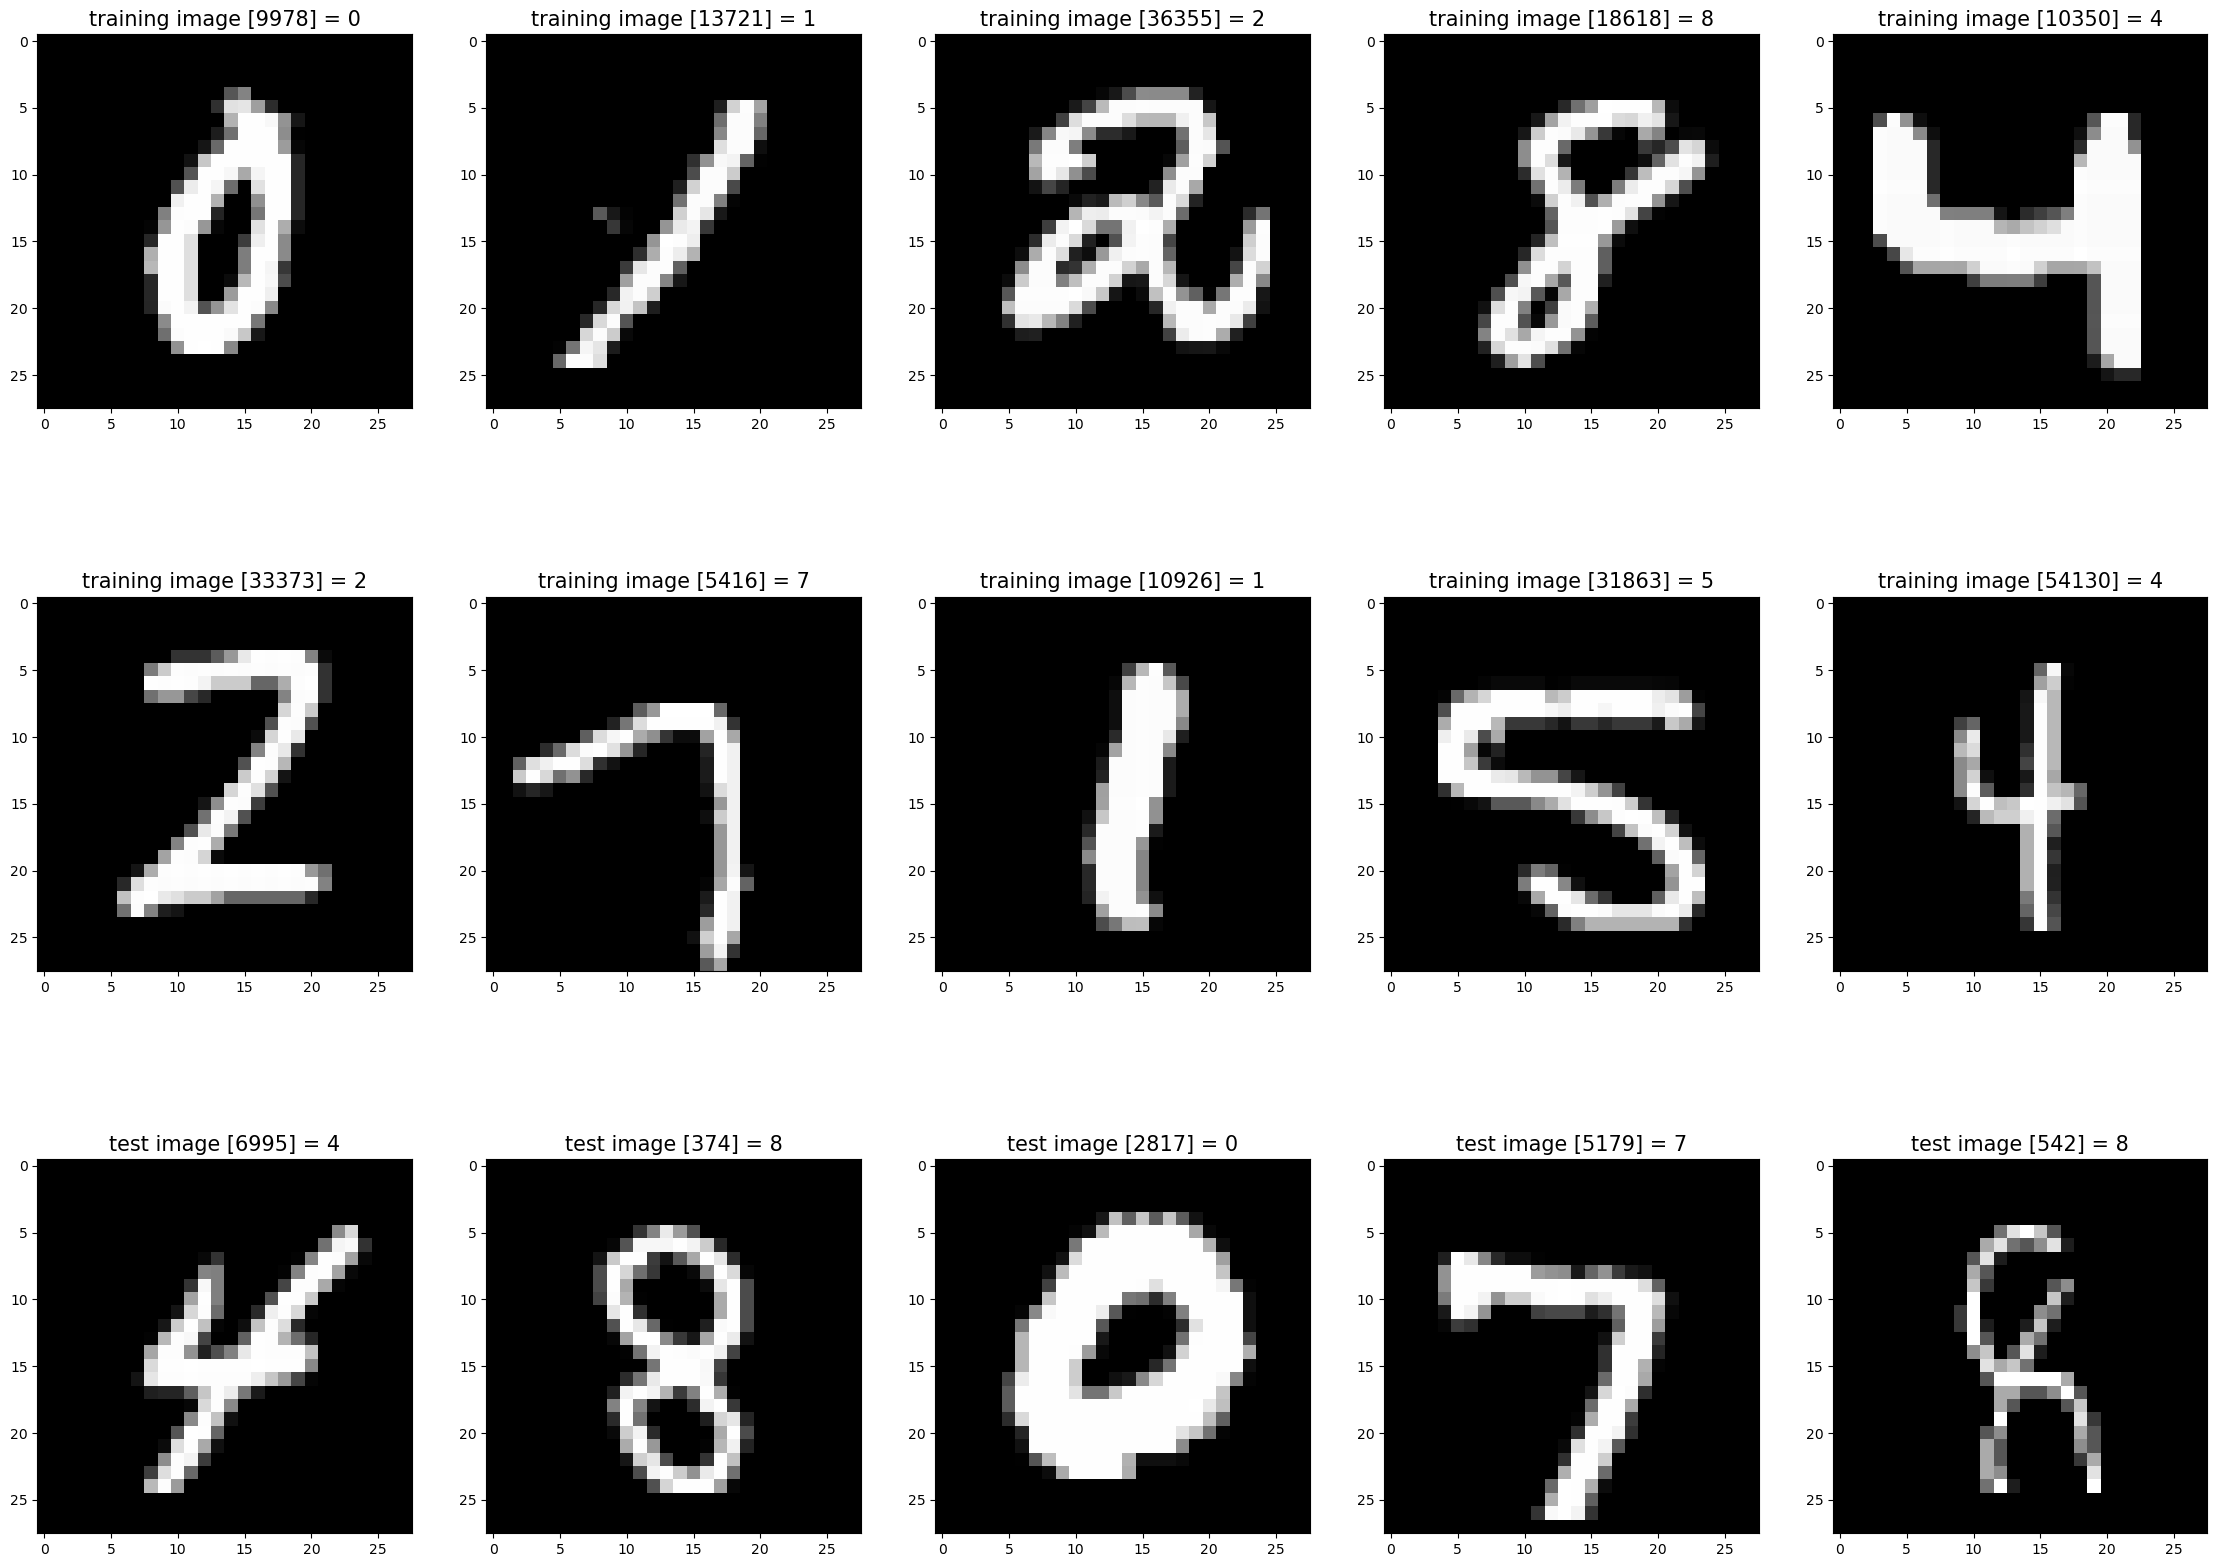

In [4]:
# Show example images
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(28, 28))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

random_images = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    random_images.append((x_train[r], 'training image [' + str(r) + '] = ' + str(y_train[r])))
for i in range(0, 5):
    r = random.randint(1, 10000)
    random_images.append((x_test[r], 'test image [' + str(r) + '] = ' + str(y_test[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

# 1. Programming Assignment

### (a) Build a customized data set, D, with labels of only two digits (e.g., images with labels of only 1 and 3). Pick a data set size that aligns with your computational capability. Show me your code. Plot a subset of your customized data set.

In [5]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [6]:
# train set
y_train_np = np.array(y_train)
x_train_np = np.array(x_train)

# label 1 and 3 train
train_label_1_index = np.where(y_train_np == 1)
train_label_3_index = np.where(y_train_np == 3)

# Train set with digits 1 and 3
x_train_1_3 = np.concatenate((x_train_np[train_label_1_index], x_train_np[train_label_3_index]), axis=0)
y_train_1_3 = np.concatenate((y_train_np[train_label_1_index], y_train_np[train_label_3_index]), axis=0)

# test set
y_test_np = np.array(y_test)
x_test_np = np.array(x_test)

# label 1 and 3 test
test_label_1_index = np.where(y_test_np == 1)
test_label_3_index = np.where(y_test_np == 3)

# Test set with digits 1 and 3
x_test_1_3 = np.concatenate((x_test_np[test_label_1_index], x_test_np[test_label_3_index]), axis=0)
y_test_1_3 = np.concatenate((y_test_np[test_label_1_index], y_test_np[test_label_3_index]), axis=0)

print("Train Dataset")
print(f"Shape of x_train with digits 1 and 3: {x_train_1_3.shape}")
print(f"Shape of y_train with digits 1 and 3: {y_train_1_3.shape} \n")
print("Test Dataset")
print(f"Shape of x_test with digits 1 and 3: {x_test_1_3.shape}")
print(f"Shape of y_test with digits 1 and 3: {y_test_1_3.shape}")

Train Dataset
Shape of x_train with digits 1 and 3: (12873, 28, 28)
Shape of y_train with digits 1 and 3: (12873,) 

Test Dataset
Shape of x_test with digits 1 and 3: (2145, 28, 28)
Shape of y_test with digits 1 and 3: (2145,)


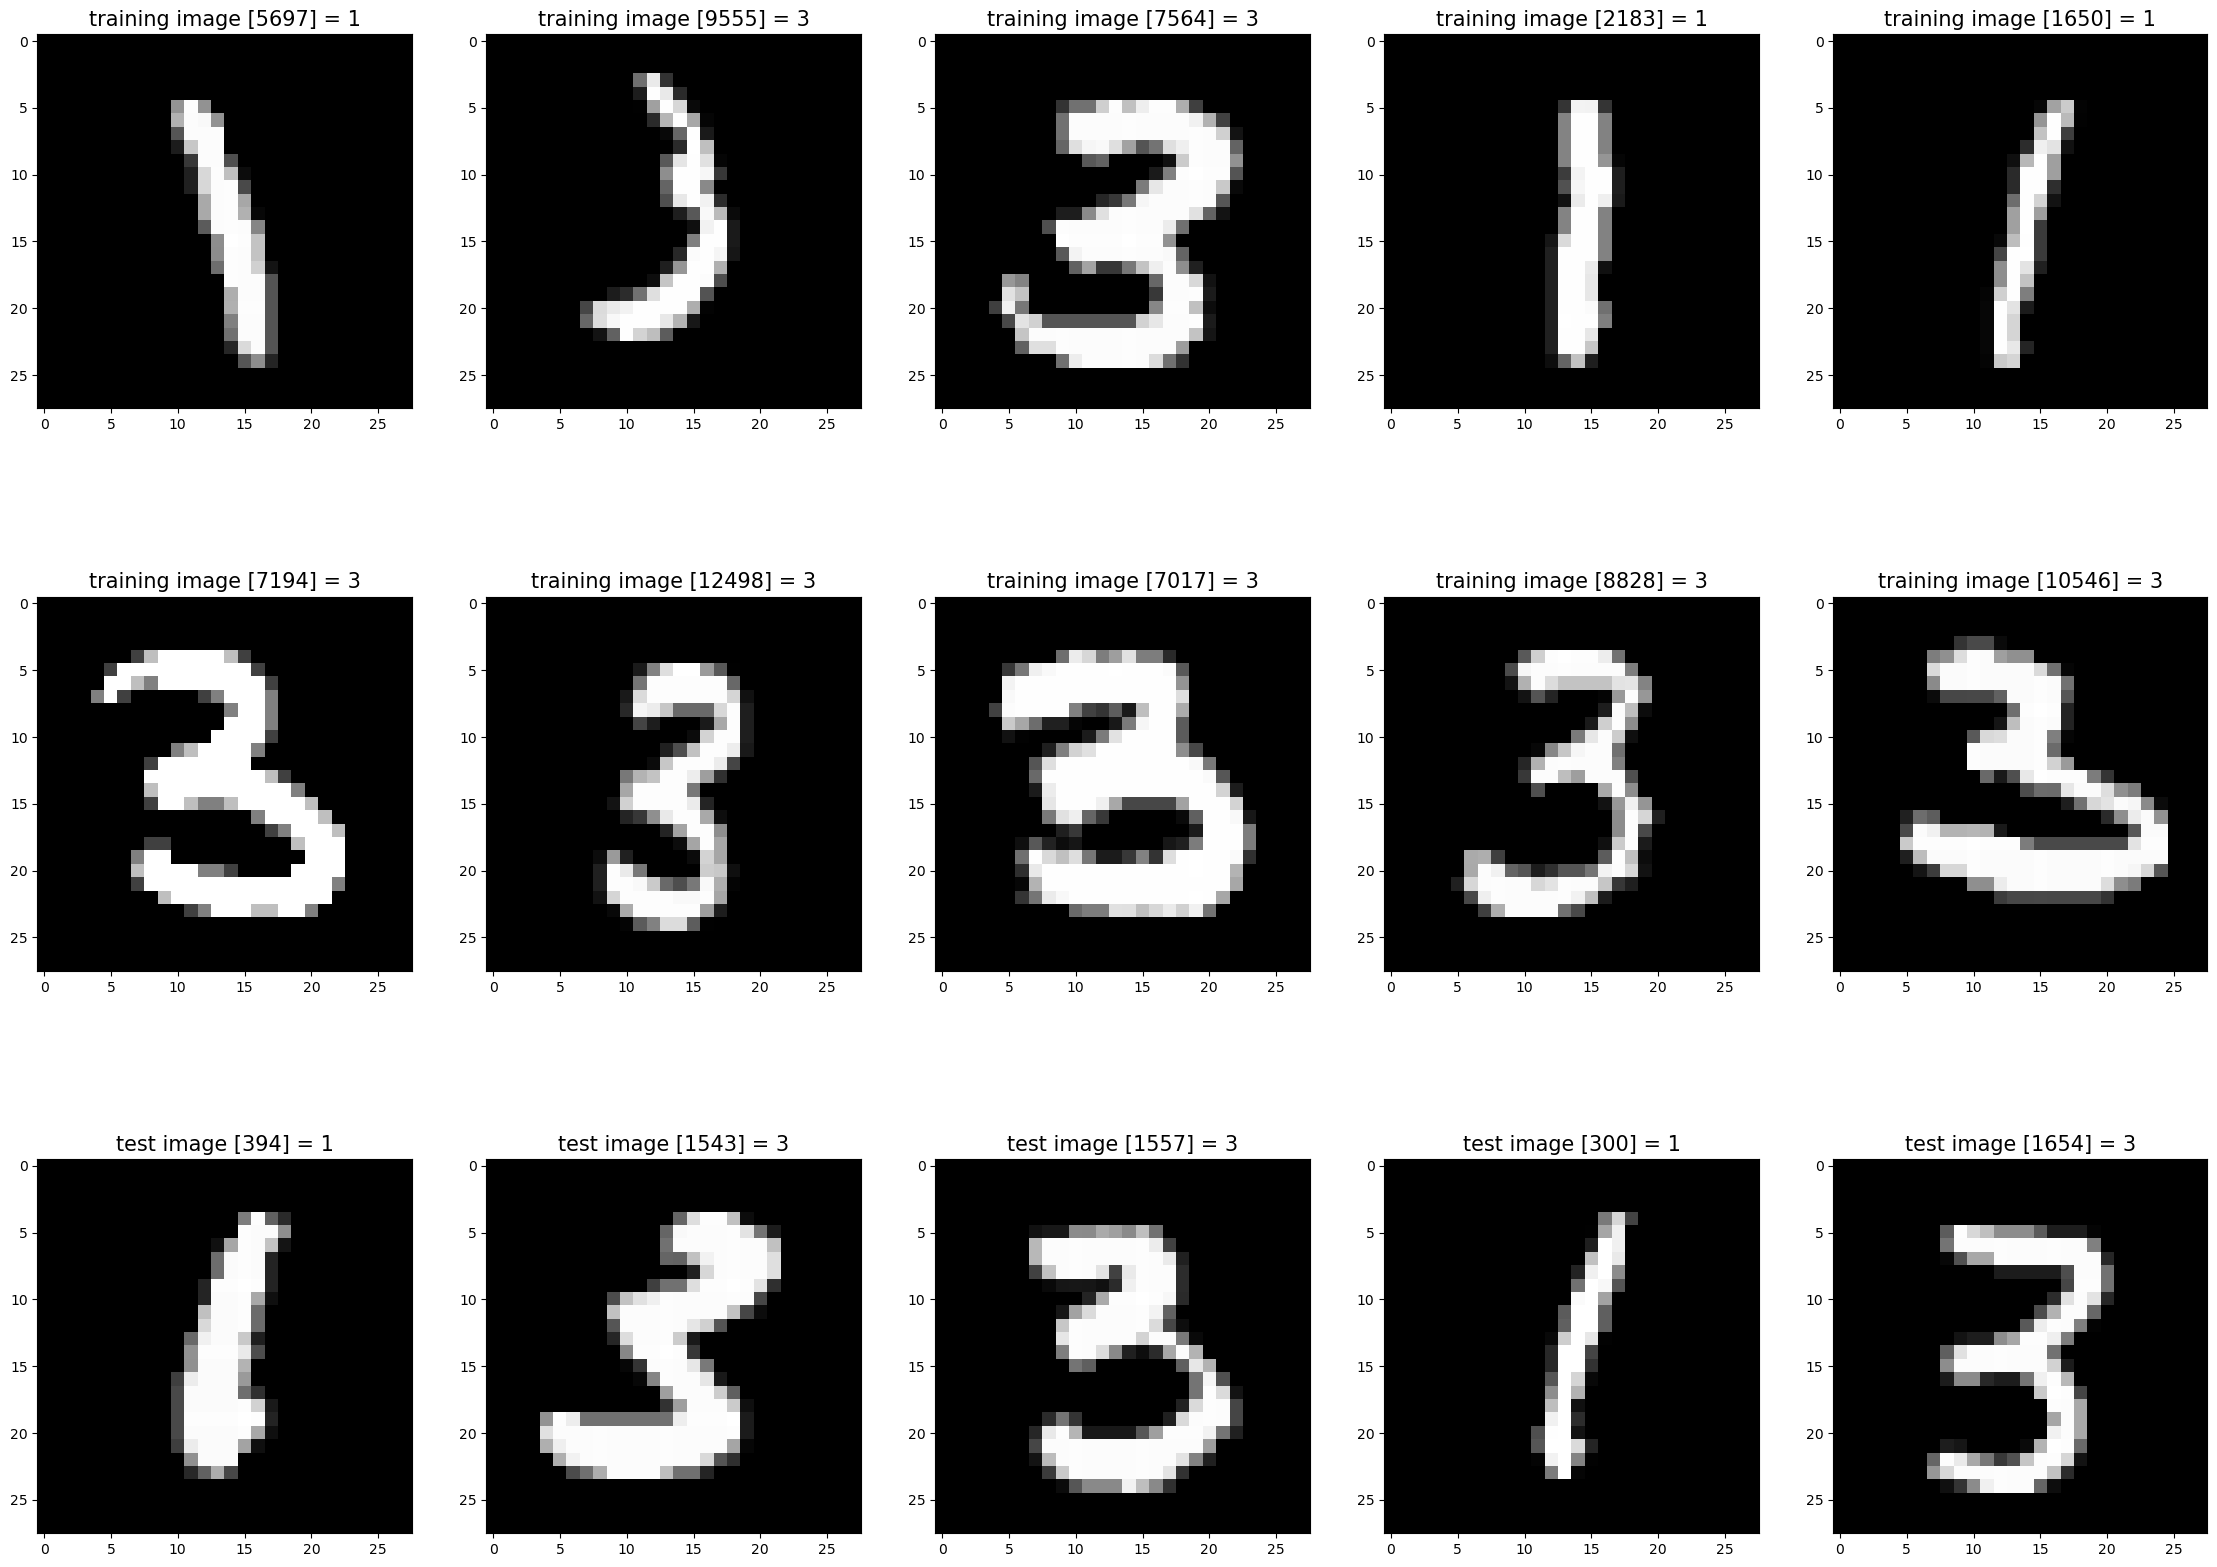

In [7]:
random_images = []
for i in range(0, 10):
    r = random.randint(1, len(x_train_1_3))
    random_images.append((x_train_1_3[r], 'training image [' + str(r) + '] = ' + str(y_train_1_3[r])))
for i in range(0, 5):
    r = random.randint(1, len(x_test_1_3))
    random_images.append((x_test_1_3[r], 'test image [' + str(r) + '] = ' + str(y_test_1_3[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

### (b) Train a CNN model with D. Sweep the data set once (i.e., with 1 epoch) with your choice of batch size, optimizer, and other configurations. Show me your code.


In [8]:
# Convert data to PyTorch tensors
train_images_tensor = torch.tensor(x_train_1_3, dtype=torch.float) / 255.0  # Normalize
train_labels_tensor = torch.tensor(y_train_1_3, dtype=torch.long)
test_images_tensor = torch.tensor(x_test_1_3, dtype=torch.float) / 255.0  # Normalize
test_labels_tensor = torch.tensor(y_test_1_3, dtype=torch.long)

# Remapping labels: 1 -> 0 and 3 -> 1
train_labels_tensor = ((train_labels_tensor - 1) / 2).long()
test_labels_tensor = ((test_labels_tensor - 1) / 2).long()

# Create TensorDatasets
train_dataset = TensorDataset(train_images_tensor.unsqueeze(1), train_labels_tensor)  # Add channel dimension
test_dataset = TensorDataset(test_images_tensor.unsqueeze(1), test_labels_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Assuming train_loader and test_loader are defined elsewhere


# Define a simple CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.dropout = nn.Dropout()
        self.fc1 = nn.Linear(1024, 128) # After flattening the conv layers, adjust the size accordingly
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 1024) # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

if torch.backends.mps.is_available():
    print ("mps is available")
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
model = Net().to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(1):  # train for 1 epochs
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Testing loop - Calculate accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the model on the test images: {accuracy * 100:.2f}%')

Train Epoch: 0 [0/12873 (0%)]	Loss: 0.716632
Train Epoch: 0 [1600/12873 (12%)]	Loss: 0.004975
Train Epoch: 0 [3200/12873 (25%)]	Loss: 0.005906
Train Epoch: 0 [4800/12873 (37%)]	Loss: 0.000877
Train Epoch: 0 [6400/12873 (50%)]	Loss: 0.020870
Train Epoch: 0 [8000/12873 (62%)]	Loss: 0.000276
Train Epoch: 0 [9600/12873 (75%)]	Loss: 0.000641
Train Epoch: 0 [11200/12873 (87%)]	Loss: 0.000092
Train Epoch: 0 [12800/12873 (99%)]	Loss: 0.000340
Accuracy of the model on the test images: 99.81%


### (c) Using the same data loader and train-test split, train a ResNet model with D. Sweep the data set once (i.e., with 1 epoch) with your choice of batch size, optimizer, and other configurations. Show me your code.


In [10]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    
class SmallResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=2):
        super(SmallResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.linear = nn.Linear(128*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [ ]:
model = SmallResNet(BasicBlock, [2, 2])

if torch.backends.mps.is_available():
    print ("mps is available")
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(1):  # train for 1 epochs
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Testing loop - Calculate accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the model on the test images: {accuracy * 100:.2f}%')

Train Epoch: 0 [0/12873 (0%)]	Loss: 0.676550
Train Epoch: 0 [1600/12873 (12%)]	Loss: 0.021555
Train Epoch: 0 [3200/12873 (25%)]	Loss: 0.001601
Train Epoch: 0 [4800/12873 (37%)]	Loss: 0.044815
Train Epoch: 0 [6400/12873 (50%)]	Loss: 0.002693


### (d) Using the same data loader and train-test split, train a Feedforward Neural Network (NN) model with D. Sweep the data set once (i.e., wiåth 1 epoch) with your choice of batch size, optimizer, and other configurations. Show me your code.


In [ ]:
# Define a simple MLP
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 2)  # 2 classes
)

if torch.backends.mps.is_available():
    print ("mps is available")
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1):  # train for 1 epochs
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(images)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


# Testing loop - Calculate accuracy
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the model on the test images: {accuracy * 100:.2f}%')

# 2. Definitions & Concepts
## 1. Consider a CNN layer with the following characteristics:
* Input volume size: 32x32x3 (where 32x32 is the spatial dimension of the input, and 3 is the number of input channels, e.g., RGB image)
* Number of conv kernels: 10
* Kernel size: 5 × 5
* Stride: 1
* Padding: 0

### (a) How many parameters does the above model have?


parameters = (input channel x kernal size x output channel) + output channel
parameters = (3 x 5 x 5 x 10) + 10 (bias) 
parameters = 760

### (b) What is the minimum size of the image that still allows the above model to remain functional and compatible?

Output size = ((Input size - Kernel size + 2*Padding)/stride) + 1 \
1 = ((Input size - 5 + 2*0)/1) + 1 \
Output size = 5

The minimum size of the image that still allows the above model to ramain funcitonal and compatible is *5x5*.

## 2. What is the key problem that ResNet aims to address in deep neural networks?

The ResNet aims to address the problem of *vanishing gradients* in deep neural networks.

## 3. What is the key problem that dropout aims to address in deep neural networks?

The key problem that dropout aims to address in deep neural networks is overfitting.